# Implementando hierarchical clustering

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

sns.set_theme(context='notebook', style='whitegrid', palette='muted')

## Preparando los datos de prueba

In [12]:
# Generando un conjunto de datos sintenticos con la funcion make_blobs

X, y, c = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame({
    "x1": X[:,0],
    "x2": X[:,1],
    'y': y
})

df_centers = pd.DataFrame({
    "x1": c[:,0],
    "x2": c[:,1]
})

## Visualizacion de datos

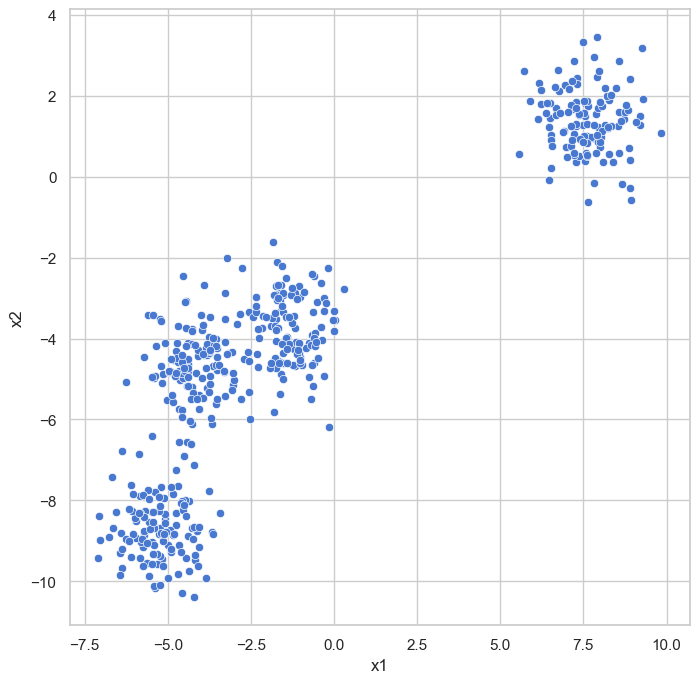

In [13]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

## Dendograma y Hierarchical Cluster

Un dendograma es una representación gráfica de la **jerarquía de los clusters** en un análisis de clustering. En un dendograma, los puntos de datos se muestran como hojas y los clusters se fusionan a medida que se asciende en el gráfico. **La altura de las fusiones en el dendograma representa la distancia o la disimilitud entre los clusters.**

Para determinar el **número óptimo de clusters (K)** a partir de un dendograma, se busca un punto en el gráfico donde haya una **mayor distancia vertical entre las fusiones sucesivas.** Este punto se puede interpretar como un "corte" en el dendograma, indicando el número de clusters óptimo.

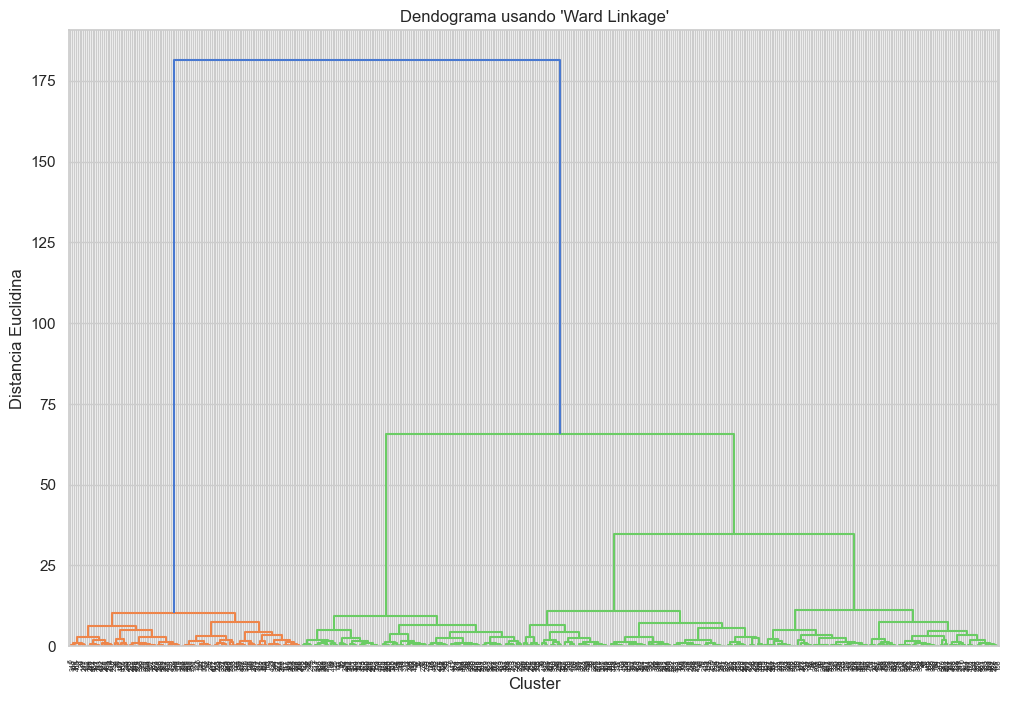

In [14]:
plt.figure(figsize=(12, 8))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title("Dendograma usando 'Ward Linkage'")
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Distancia Euclidina", fontsize=12)
plt.show()

En el caso de separar en 4 clusters, se buscará en el dendograma un punto donde haya una distancia vertical significativa entre la fusión de 3 clusters y la siguiente fusión. Este punto se identificará como el número óptimo de clusters, en este caso, 4.

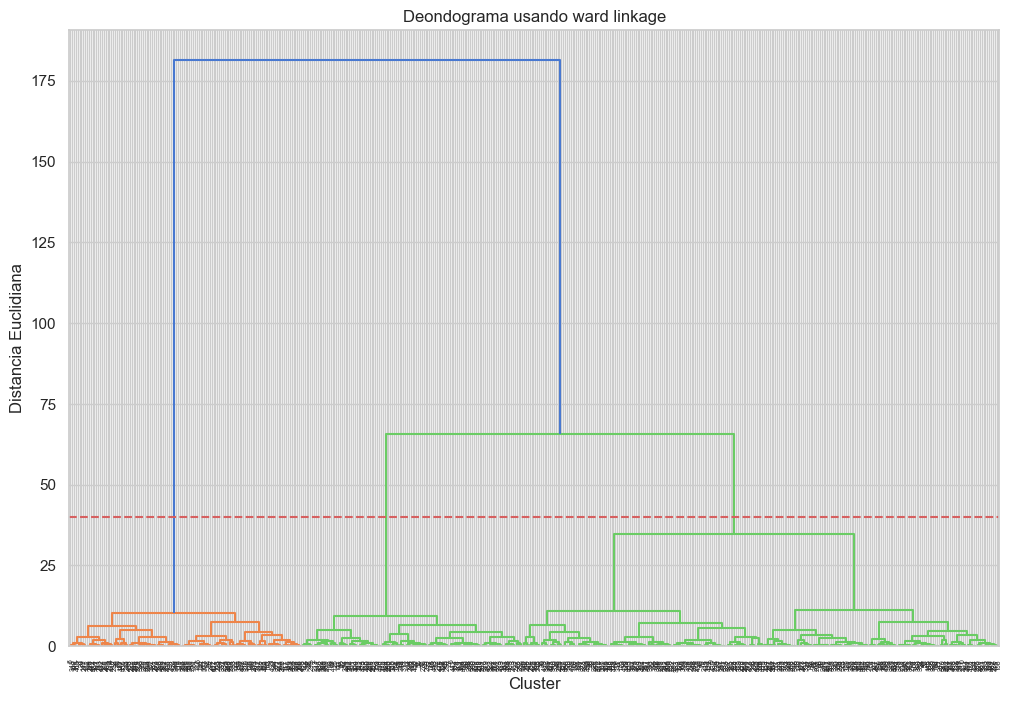

In [15]:
plt.figure(figsize=(12, 8))

dendrogram_plot = dendrogram(linkage(X, method='ward'))

plt.title("Deondograma usando ward linkage")
plt.hlines(y=40, xmin=0, xmax=5000, linestyles='dashed', colors='r')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Distancia Euclidiana", fontsize=12)
plt.show()

In [16]:
# hc = Herarchical Clustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
estimador_hc = hc.fit(X)

In [17]:
df_blobs['cluster'] = y_hc

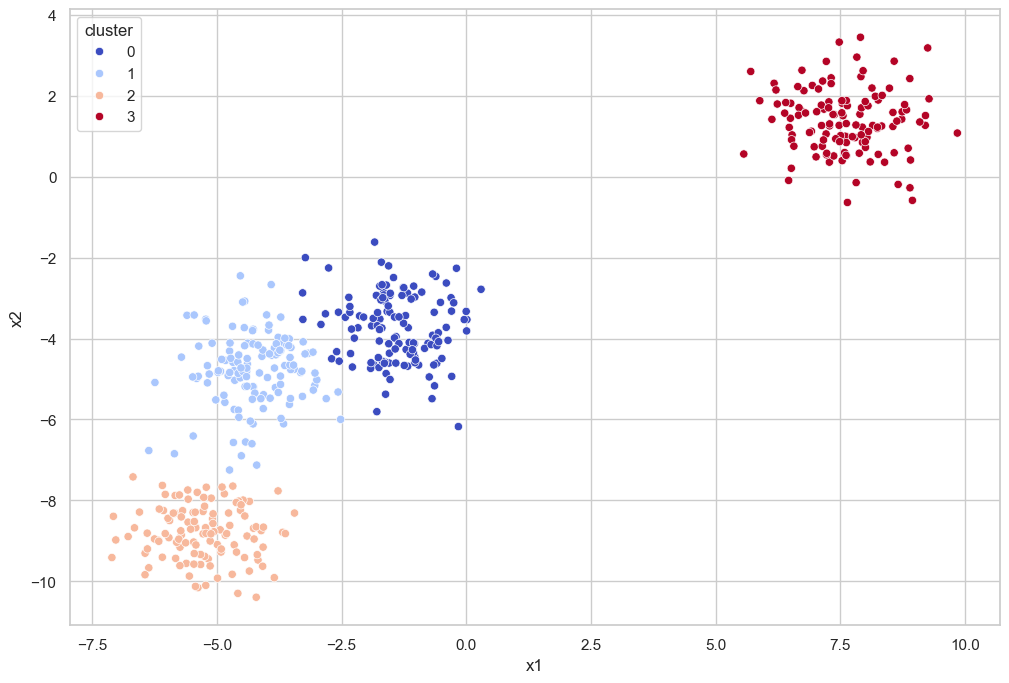

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
plt.show()

## Evaluación de hierarchical clustering

In [20]:
silhouette_score(X, y_hc)

0.6523442633057531

El **coeficiente de silueta** del clustering jerárquico fue de **0.75**, indicando una estructura de clusters adecuada y puntos bien asignados a sus respectivos grupos.

Ahora nos enfrentamos a un desafío al intentar generar la gráfica de silueta para el clustering jerárquico aglomerativo. A diferencia del algoritmo KMeans, el clustering jerárquico no proporciona centroides. Sin embargo, encontramos un artículo en la documentación de Scikit-learn que nos brinda un código modificado para adaptarlo al clustering jerárquico y así poder generar la gráfica de silueta.

[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

For n_clusters = 3 The average silhouette_score is : 0.6687056208273182
For n_clusters = 4 The average silhouette_score is : 0.6523442633057531
For n_clusters = 5 The average silhouette_score is : 0.5972567814946689
For n_clusters = 6 The average silhouette_score is : 0.5331155542145204


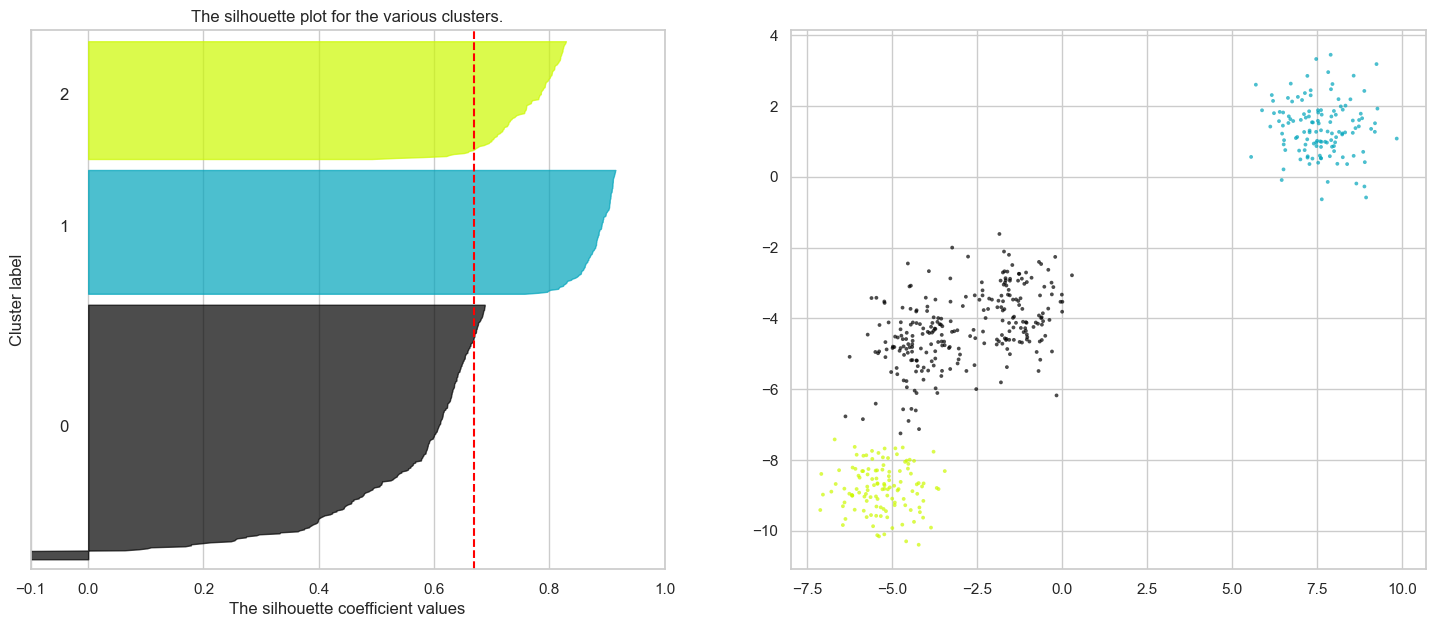

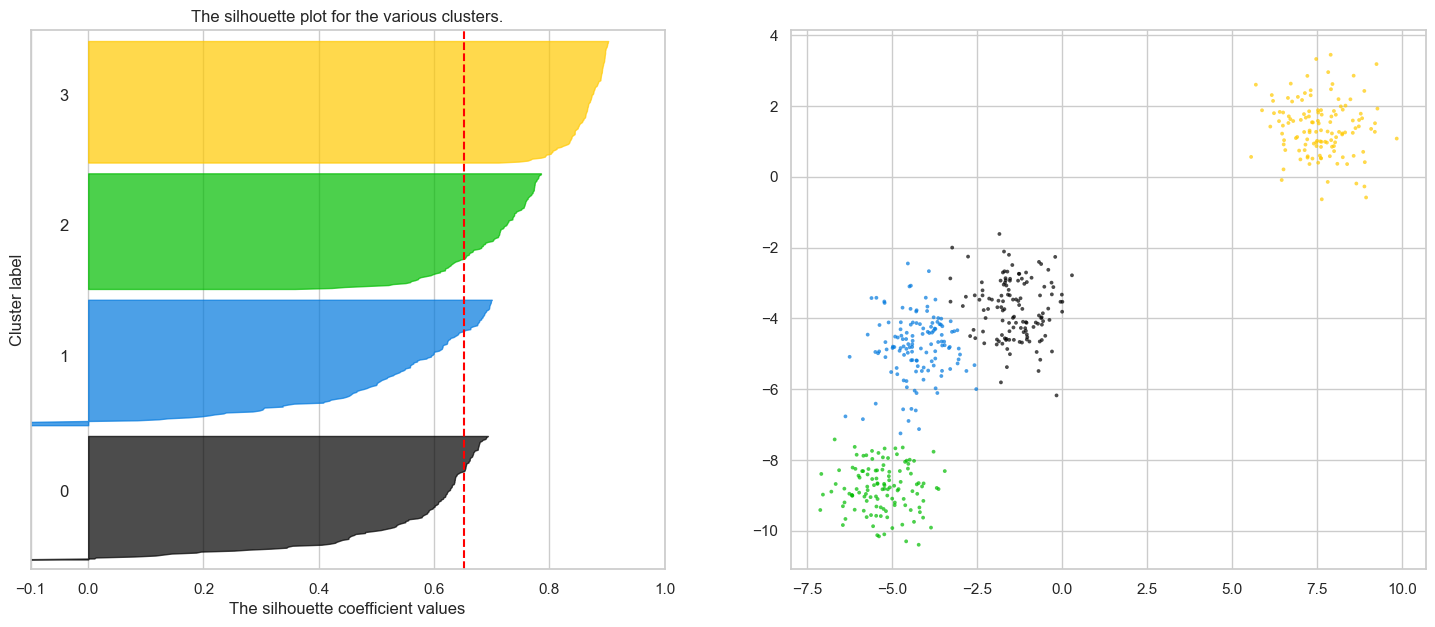

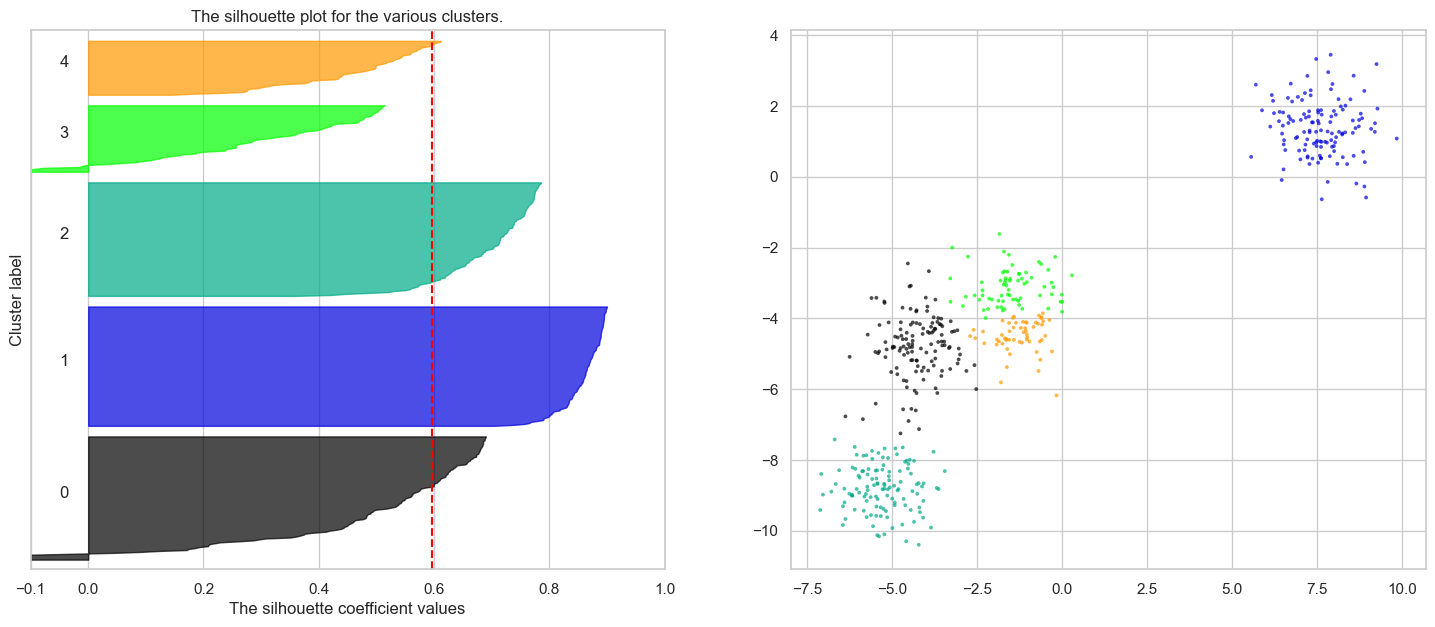

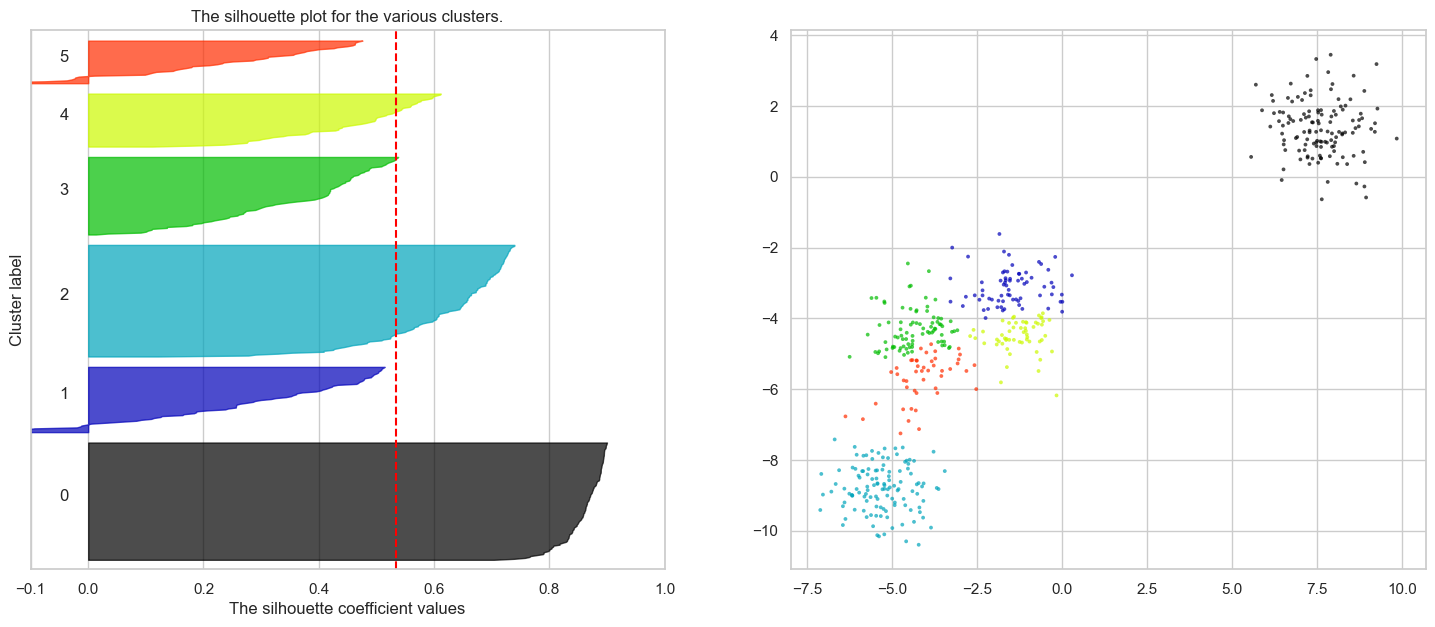

In [21]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
plt.show()

Ahora que hemos adaptado el código, podemos observar que con 5 y 6 clusters se producen superposiciones en los datos, lo que resulta en valores negativos en la gráfica de silueta. Esto indica que la asignación de puntos a los clusters en esos casos no es óptima y existen ciertos solapamientos.